In [ ]:
import pandas as pd
import numpy as np


In [ ]:
%cd sample_data

/content/sample_data


In [ ]:
!ls

anscombe.json		      lambert_test.py		 README.md
atlantic.csv		      mnist_test.csv		 untitled
california_housing_test.csv   mnist_train_small.csv	 untitled1
california_housing_train.csv  projection_constants.json
lambert.py		      __pycache__


In [ ]:
data= pd.read_csv("atlantic.csv")
data.head(3)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
len(data.ID.unique())

1814

In [ ]:
data.groupby(by=["ID"]).Name.count()

ID
AL011851    14
AL011852    45
AL011853     1
AL011854    11
AL011855     1
            ..
AL282005    33
AL291969    17
AL292005    42
AL302005    43
AL312005    36
Name: Name, Length: 1814, dtype: int64

In [ ]:
data.groupby(by=["ID"]).Name.count().max()

133

In [ ]:
data.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


In [ ]:
data.isnull().sum(axis = 0)

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [ ]:
data['Latitude1'] = data['Latitude'].str[:-1]
data['Latitudesign'] = data['Latitude'].str[-1]
data['Longitude1'] = data['Longitude'].str[:-1]
max(data['Longitude1'])
#data.head(5)


'99.9'

In [ ]:
import numpy as np
import pandas as pd
import json
from lambert import Lambert

# Test if our custom implementation of Lambert projection yields same results as Cartopy:
with open('projection_constants.json', 'r') as f: const = json.load(f)

# data['Latitude1'] = data['Latitude'].map(lambda x: float(str(x)[:-3]))
# data['Longitude1'] = data['Longitude'].map(lambda x: float(str(x)[:-3]))
data['Latitude1'] = pd.to_numeric(data['Latitude1'])
data['Longitude1'] = pd.to_numeric(data['Longitude1'])
lat_true = data['Latitude1']
lon_true = data['Longitude1']

lamb = Lambert(
    standard_parallels=(const['phi_1'], const['phi_2']),
    central_latitude=const['phi_F'], central_longitude=const['lambda_F'],
    false_easting=const['E_F'], false_northing=const['N_F'],
    semimajor_axis = const['a'], inverse_flattening = const['f_inv']
)

x_test, y_test = lamb.geographic2cartesian(lat_true, lon_true)
data['lcc_x'] = x_test
data['lcc_y'] = y_test
# print('Forward direction - largest absolute errors: x = {}, y = {}'.format(np.max(np.abs(x_test-x_true)), np.max(np.abs(y_test-y_true))))

# lat_test, lon_test = lamb.cartesian2geographic(x_true, y_true)
# print('Backward direction - largest absolute errors: lat = {}, lon = {}'.format(np.max(np.abs(lat_test-lat_true)), np.max(np.abs(lon_test-lon_true))))



359.1

In [ ]:

data['difference_lat'] = data.groupby('ID')['Latitude1'].diff()
data['difference_lon'] = data.groupby('ID')['Longitude1'].diff()
data['trans_dir'] = np.arctan(data['difference_lat']/data['difference_lon'])

In [ ]:
data.head(5)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Latitude1,Longitude1,lcc_x,lcc_y,difference_lat,difference_lon,trans_dir,trans_speed,Longitudesign,Latitudesign
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,28.0,94.8,7.964132e+06,9.331641e+06,NaN,NaN,NaN,NaN,W,N
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,28.0,95.4,7.985278e+06,9.390130e+06,0.0,0.6,0.000000,2.727200,W,N
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,28.0,96.0,8.005972e+06,9.448781e+06,0.0,0.6,0.000000,2.727200,W,N
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,28.1,96.5,8.011821e+06,9.501550e+06,0.1,0.5,0.197396,2.329212,W,N
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,28.2,96.8,8.010735e+06,9.534683e+06,0.1,0.3,0.321751,1.455758,W,N


In [ ]:
def haversine(coord1: object, coord2: object, lat2: object, lon2: object):
    import math

    # # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    # lon1, lat1 = coord1
    # lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat2 - coord1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(coord1)
    delta_lambda = math.radians(coord2)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)/(6*3600)
    return meters



In [ ]:
data['trans_speed'] = data.apply(lambda x: haversine(x['difference_lat'],x['difference_lon'],x['Latitude1'],x['Longitude1']), axis=1)
data.head(5)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,High Wind NW,Latitude1,Latitudesign,Longitude1,lcc_x,lcc_y,difference_lat,difference_lon,trans_dir,trans_speed
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,28.0,N,94.8,7.964132e+06,9.331641e+06,NaN,NaN,NaN,NaN
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,28.0,N,95.4,7.985278e+06,9.390130e+06,0.0,0.6,0.000000,2.727200
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,28.0,N,96.0,8.005972e+06,9.448781e+06,0.0,0.6,0.000000,2.727200
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,28.1,N,96.5,8.011821e+06,9.501550e+06,0.1,0.5,0.197396,2.329212
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,28.2,N,96.8,8.010735e+06,9.534683e+06,0.1,0.3,0.321751,1.455758


In [ ]:
max(data['trans_speed'][1:])

40.48433027777778

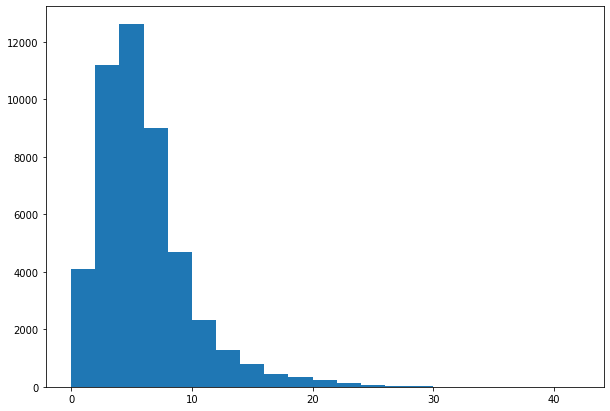

In [ ]:

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['trans_speed'], bins = range(0,44,2))
 
# Show plot
plt.show()

In [ ]:
clean =  data2['Longitude1']>=-180
data3 = data2[clean]


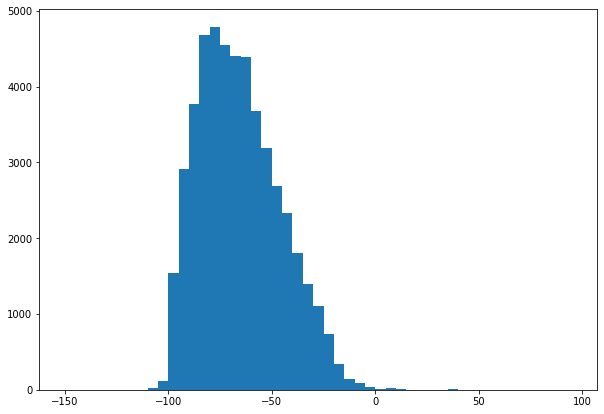

-109.5

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data3['Longitude1'], bins = range(-150,100,5))
 
# Show plot
plt.show()
min(data3['Longitude1'])

In [ ]:
data2 = data.groupby('ID').filter(lambda x: len(x) > 6)

In [ ]:
max(data2['Longitude1'])

63.0

In [ ]:
min(data2['Longitude1'])

-359.1

In [ ]:
is_359 =  data2['Longitude1']<-109.5
data_359 = data2[is_359]
print(data_359)

             ID                 Name      Date  Time Event Status Latitude  \
22984  AL051952              UNNAMED  19520914   600           EX    43.2N   
22985  AL051952              UNNAMED  19520914  1200           EX    44.0N   

      Longitude  Maximum Wind  Minimum Pressure  ...  High Wind SW  \
22984    359.1W            35              -999  ...          -999   
22985    358.4W            35              -999  ...          -999   

       High Wind NW  Latitude1  Longitude1         lcc_x         lcc_y  \
22984          -999       43.2      -359.1  6.703699e+06  1.267456e+07   
22985          -999       44.0      -358.4  6.609661e+06  1.272243e+07   

       difference_lat  difference_lon  trans_dir  trans_speed  
22984             0.9          -358.9  -0.002508     6.225381  
22985             0.8             0.7   0.851966     4.875460  

[2 rows x 30 columns]


In [ ]:
a1 = lamb.geographic2cartesian(7.4, 109.5)
a2 = lamb.geographic2cartesian(81, 109.5)
a3 = lamb.geographic2cartesian(7.4, 63)
a4 = lamb.geographic2cartesian(81, 63)



In [206]:
import math 

In [212]:
d1=math.sqrt((a2[0]-a3[0])**2+(a2[1]-a3[1])**2);
d2=math.sqrt((a1[0]-a3[0])**2+(a2[1]-a3[1])**2);
area_gridspace = math.sqrt(0.5*d1*d2/3600)
print(area_gridspace,d1,d2)

98403.33209087985 9206380.46863964 7572916.82186315
